In [1]:
# All necessary library and package imports

# tabular data manipulation ; I see it as excel on steroids
import pandas as pd

# main plotting library
import matplotlib.pyplot as plt

# numerical calculations
import numpy as np

# machine learning library
from sklearn import datasets

# Principal component analysis
from sklearn.decomposition import PCA

# systems library to manipulate folders/files
import sys

# For the interactive display
from IPython.display import display, Markdown, clear_output

# For the widgets in the interactive display
from ipywidgets import (
    interactive,
    Select,
    Dropdown,
    FloatRangeSlider,
    Button,
    VBox,
    HBox,
    Box,
    Tab,
    ToggleButton,
    BoundedIntText,
    Output,
    SelectionRangeSlider,
    Label,
    Text,
)

# to have nice graphs with zoom function in the jupyter notebook
%matplotlib notebook

In [2]:
# for some reason needs to be run twice
%matplotlib notebook

In [3]:
# Add the scripts folder to the python PATH and import my scripts for plotting
sys.path.append("../scripts/")
sys.path.append(".")
from plotter import (
    scatter_plot_color,
    is_datetime,
    create_PCA_figure,
    add_intervals_parity_plot,
    f_save,
)

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]],
    columns=iris["feature_names"] + ["target"],
)
converter = {0: "setosa", 1: "versicolor", 2: "virginica"}
df["target"] = df["target"].replace(converter)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Create all widgets

# widget for filtering the DataFrame
sliders = {}
for col in df.columns:
    if df[col].dtype == "float":
        minn = df[col].min()
        maxx = df[col].max()
        range_slider = FloatRangeSlider(
            value=[minn, maxx],
            min=minn,
            max=maxx, 
            step=0.1,
            description=col,
            readout_format='.1f',
        )
        sliders[col] = range_slider
        
    elif pd.api.types.is_datetime64_dtype(df[col]):
        minn = df[col].min()
        maxx = df[col].max()
        fmt = ' %Y-%m-%d '
        date_range = pd.date_range(start=minn, end=maxx, freq='D')
        options = [(item.strftime(fmt), item) for item in date_range]
        
        range_slider = SelectionRangeSlider(
            options=options,
            index=(0, len(options) - 1)
        )
        sliders[col] = range_slider
        
# Wich columns to plot
xas_widget = Dropdown(
    options=list(df.columns),
    description='x-axis',
    value=df.columns[0]
)
yas_widget = Dropdown(
    options=list(df.columns),
    description='y-axis',
    value=df.columns[1]
)
color_widget = Dropdown(
    options=list(df.columns), description='coloring', value=df.columns[1]
)    

plot_button = Button(
    description='Plot',
)

save_button = Button(
    description='Save figure',
)

figure_name = Text(
    value='figure_name',
    placeholder='Type something',
    disabled=False
)

grid_button = ToggleButton(
    value=False,
    description='Grid',
    icon='check'
)

add_interval_button = ToggleButton(
    value=False,
    description="intervals",
    icon="check",
)

marker_size_input = BoundedIntText(
    value=20,
    min=1,
    max=50,
    step=5,
    description='Marker size',
    disabled=False,
)

# Create the tabs to interact with the widgets
sliderbox = [HBox(children=[Label(sliders[slider].description), sliders[slider]]) for slider in sliders]

tab2 = VBox(children=sliderbox)
tab1 = HBox(children=[
    VBox(children=[xas_widget, yas_widget, color_widget]),
    VBox(children=[
        HBox(children=[grid_button, add_interval_button]),
        marker_size_input]),
])
    
tab = Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'filtering')

In [6]:
def update_plot(**kwargs):
    global f
    df_copy = df.copy()
    
    for col in sliders:
        minn = sliders[col].value[0]
        maxx = sliders[col].value[1]
        filter_upper = df_copy[col] <= maxx
        filter_downer = df_copy[col] >= minn
        df_copy = df_copy[filter_upper]
        df_copy = df_copy[filter_downer]
        
    f, ax = plt.subplots()
    plt.ion()
    xas = xas_widget.value
    yas = yas_widget.value
    coloring = color_widget.value
    grid = grid_button.value
    markersize = marker_size_input.value
    add_intervals = add_interval_button.value 
    
    scatter_plot_color(
        f,
        ax,
        df_copy,
        xas,
        yas,
        coloring,
        markersize,
    )
    
    if add_intervals:
        add_intervals_parity_plot(ax)
    
    ax.grid(grid)
    
    return f

<IPython.core.display.Javascript object>


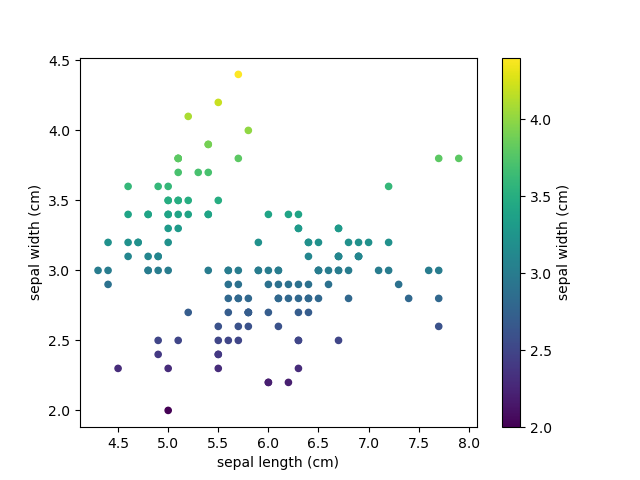

In [7]:
taskbar = VBox(children=[
    tab,
    HBox(children=[
        plot_button,
        figure_name,
        save_button,
    ])
])

@plot_button.on_click
def plot_on_click(b):
    clear_output()
    display(taskbar)
    update_plot()
    
@save_button.on_click
def save_fig(b):
    global f
    f_name = figure_name.value
    f_save(f, f_name)
    
display(taskbar)

# Time series

In [ ]:
df = pd.read_csv('http://bit.ly/30iosS6', parse_dates=['date'])
df.head()

In [ ]:
df.plot()

In [ ]:
# Make an updateable plot structure
xas_widget = Dropdown(
    options=list(df.columns),
    description='x-axis',
    value=df.columns[0]
)
yas_widget = Dropdown(
    options=list(df.columns),
    description='y-axis',
    value=df.columns[1]
)
color_widget = Dropdown(
    options=list(df.columns),
    description='coloring',
    value=df.columns[1]
)

def update_plot(**kwargs):
    f, ax = plt.subplots()
    plt.ion()
    xas = xas_widget.value
    yas = yas_widget.value
    coloring = color_widget.value
    scatter_plot_color(
        f,
        ax,
        df,
        xas,
        yas,
        coloring,
    )
    
interactive(
    update_plot,
    xas=xas_widget,
    yas=yas_widget,
    coloring=color_widget
)

In [ ]:

tab1